In [1]:
from sympy import *
mm=0.001

sigma_1= 17.865619497935278
sigma_2= -104.12846128216037
theta_p= 67.5
tau_max= 60.99704039004783
theta_s= 22.5
center = -43.13142089211255


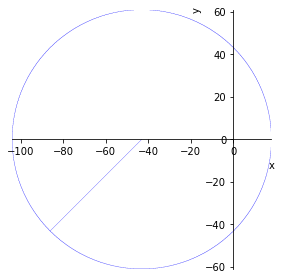

In [24]:
T=40
r=250*mm

F_Mag=T/(r*sin(60*pi/180))

nF=Matrix([cos(60*pi/180),-sin(60*pi/180),0])
F=nF*F_Mag

rF=Matrix([-r,0,0])

FB=-F[1]


do=20*mm
di=16*mm
ro=do/2
ri=di/2

I=pi/4*(ro**4-ri**4)
J=I*2
Q=1/12*(do**3-di**3)
thick=do-di

M=FB*r

sigma_y=0
sigma_x=-float(M*ro/I)/1e6
tau_xy=float(T*ro/J)/1e6





center=(sigma_x+sigma_y)/2
R=(((sigma_x-sigma_y)/2)**2+tau_xy**2)**0.5

#计算sigma最大值
sigma_1=center+R
sigma_2=center-R
theta_p=atan((sigma_1-sigma_x)/tau_xy)

#计算tau的最大值
tau_max=R
theta_s=atan((sigma_x-sigma_y)/(-2*tau_xy))/2

print('sigma_1=',float(sigma_1))
print('sigma_2=',float(sigma_2))
print('theta_p=',float(theta_p*180/pi))
print('tau_max=',float(tau_max))
print('theta_s=',float(theta_s*180/pi))
print('center =',center)

#莫尔圆图像
p=None #清空上一次图像
x,y=S('x,y')
k=tau_xy/(sigma_x-center)*-1
p =plot_implicit(Eq((x-center)**2 + y**2, R**2),(x,center-R,center+R),(y,-R,R),aspect_ratio=(1.,1.),  points=400,show=False)
p1=plot_implicit(Eq(k*(x-center)-y,0)       ,(x,center,sigma_x),(y,-R,R),aspect_ratio=(1.,1.),  points=400,show=False, linewidth=100)
p.extend(p1)
p.show()

In [25]:
sigma_x,sigma_y,tau_xy

(-86.2628417842251, 0, 43.13142089211255)